<a href="https://colab.research.google.com/github/being-imu/Hepatitis-C-Prediction/blob/main/Using%20K-NN%20and%20Decition%20tree%20algorithm%20Hepatitis%20C%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- To appreciate the role of K-NN and Decision Tree algorithms in classification
- To implement both K-NN and Decision Tree on the same datset and reflect upon the difference in their performance


### Import useful libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

### Load Data From CSV File  (hcvdat0.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab


In [ ]:
ls


 hcvdat.csv   total_cases.csv  'Wetland Data.csv'   World_GDP.csv


In [ ]:
data = pd.read_csv('hcvdat.csv')

### Drop all the rows having missing values

In [ ]:
new_data = data.dropna()
print(new_data)

     Unnamed: 0       Category  Age Sex   ALB    ALP   ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5   7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3  18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7  36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0  30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1  32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...   ...    ...   ...   
608         609    3=Cirrhosis   58   f  34.0   46.4  15.0  150.0   8.0   
609         610    3=Cirrhosis   59   f  39.0   51.3  19.6  285.8  40.0   
610         611    3=Cirrhosis   62   f  32.0  416.6   5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8   2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3   3.5   99.0  48.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.17  4.80   74

### Select ALP, ALT, BIL, CHOL as inputs. Ignore all other input variables for now. You should have an array X containing all these input variables of interest.

In [ ]:
X = new_data[['ALP','ALT','BIL','CHOL']]
y = new_data['Category']

X

,ALP,ALT,BIL,CHOL
0,52.5,7.7,7.5,3.23
1,70.3,18.0,3.9,4.80
2,74.7,36.2,6.1,5.20
3,52.0,30.6,18.9,4.74
4,74.1,32.6,9.6,4.32
...,...,...,...,...
608,46.4,15.0,8.0,3.98
609,51.3,19.6,40.0,4.51
610,416.6,5.9,50.0,6.30
611,102.8,2.9,20.0,3.02


### Perform z-score (standardisation) for all the elements of the input array, X.

In [ ]:
z_score_x = stats.zscore(X)
z_score_x

,ALP,ALT,BIL,CHOL
0,-0.603230,-0.905494,-0.202289,-1.916091
1,0.084054,-0.411380,-0.409283,-0.524241
2,0.253944,0.461714,-0.282787,-0.169629
3,-0.622536,0.193070,0.453193,-0.577433
4,0.230777,0.289014,-0.081542,-0.949775
...,...,...,...,...
608,-0.838760,-0.555297,-0.173540,-1.251194
609,-0.649564,-0.334624,1.666409,-0.781334
610,13.455196,-0.991844,2.241393,0.805552
611,1.338926,-1.135760,0.516441,-2.102261


### Inspect the first 5 rows of the output variable (class) of interest, which is Category.

In [ ]:
z_score_x

,ALP,ALT,BIL,CHOL
0,-0.603230,-0.905494,-0.202289,-1.916091
1,0.084054,-0.411380,-0.409283,-0.524241
2,0.253944,0.461714,-0.282787,-0.169629
3,-0.622536,0.193070,0.453193,-0.577433
4,0.230777,0.289014,-0.081542,-0.949775
...,...,...,...,...
608,-0.838760,-0.555297,-0.173540,-1.251194
609,-0.649564,-0.334624,1.666409,-0.781334
610,13.455196,-0.991844,2.241393,0.805552
611,1.338926,-1.135760,0.516441,-2.102261


### Split the data into Train and Test data as we do in any typical machine learning algorithm


In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(z_score_x,y,test_size=.3)

### Develop a classification algorithm to predict the Category, using K-NN machine learning algorithm.

## K nearest neighbor (K-NN)

#### Import library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Train the K-NN model

Lets start the algorithm with k=4 for now:

In [ ]:
 k = 4
 neigh = KNeighborsClassifier(k).fit(X_train,y_train)

### Predict the category of the test data using the trained K-NN modeel


In [ ]:
y_pred = neigh.predict(X_test)
y_pred

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '3=Cirrhosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '3=Cirrhosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '3=Cirrhosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Bloo

### Evaluate the accuracy of the K-NN model over the test data.


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8870056497175142


### Train the K-NN model with the various values of K. You can run the following loop to try different K and the accuracy associated with each K.


In [ ]:
Ks = 10
acc = np.zeros(Ks)
for n in range(1,Ks+1):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc[n-1] = accuracy_score(y_pred, y_test)

acc

array([0.88135593, 0.88135593, 0.88135593, 0.88700565, 0.88135593,
       0.88135593, 0.8700565 , 0.8700565 , 0.87570621, 0.88700565])

#### Plot  model accuracy  for Different number of Neighbors

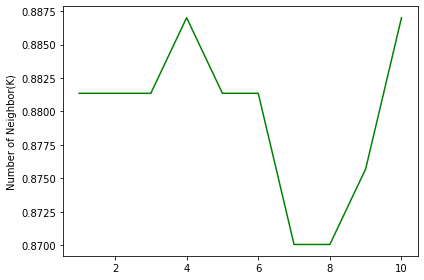

In [ ]:
plt.plot(range(1,Ks+1),acc,'g')
plt.ylabel('Accuracy')
plt.ylabel('Number of Neighbor(K)')
plt.tight_layout()
plt.show()


### Based on the above performance evaluation, which value of K would you choose now?

Based on above performence I chose K = 4

### Train a Decision Tree model for the same data and compare the performance between K-NN and Decision Tree.

## Setting up the Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
HepTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
HepTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [ ]:
treepred = HepTree.predict(X_test)

### Evaluate the accuracy of the Decision Tree model over the test data.


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8870056497175142
